In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [4]:
df['Species'] = df['Species'].replace(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], [0,1,2])

In [5]:
df.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
61,62,5.9,3.0,4.2,1.5,1
131,132,7.9,3.8,6.4,2.0,2
69,70,5.6,2.5,3.9,1.1,1
140,141,6.7,3.1,5.6,2.4,2
30,31,4.8,3.1,1.6,0.2,0


In [6]:
X = df.drop(['Id','Species'],axis=1)
y = df['Species']

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
# Click on the above link to see the default parameters of decision tree in sklearn

tree = DecisionTreeClassifier()

In [11]:
tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [12]:
# These are the libraries to install for visualizing the decision Tree

#!pip install six
#!pip install pydotplus
#!pip install graphviz

In [13]:
# Importing required packages for visualization

from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

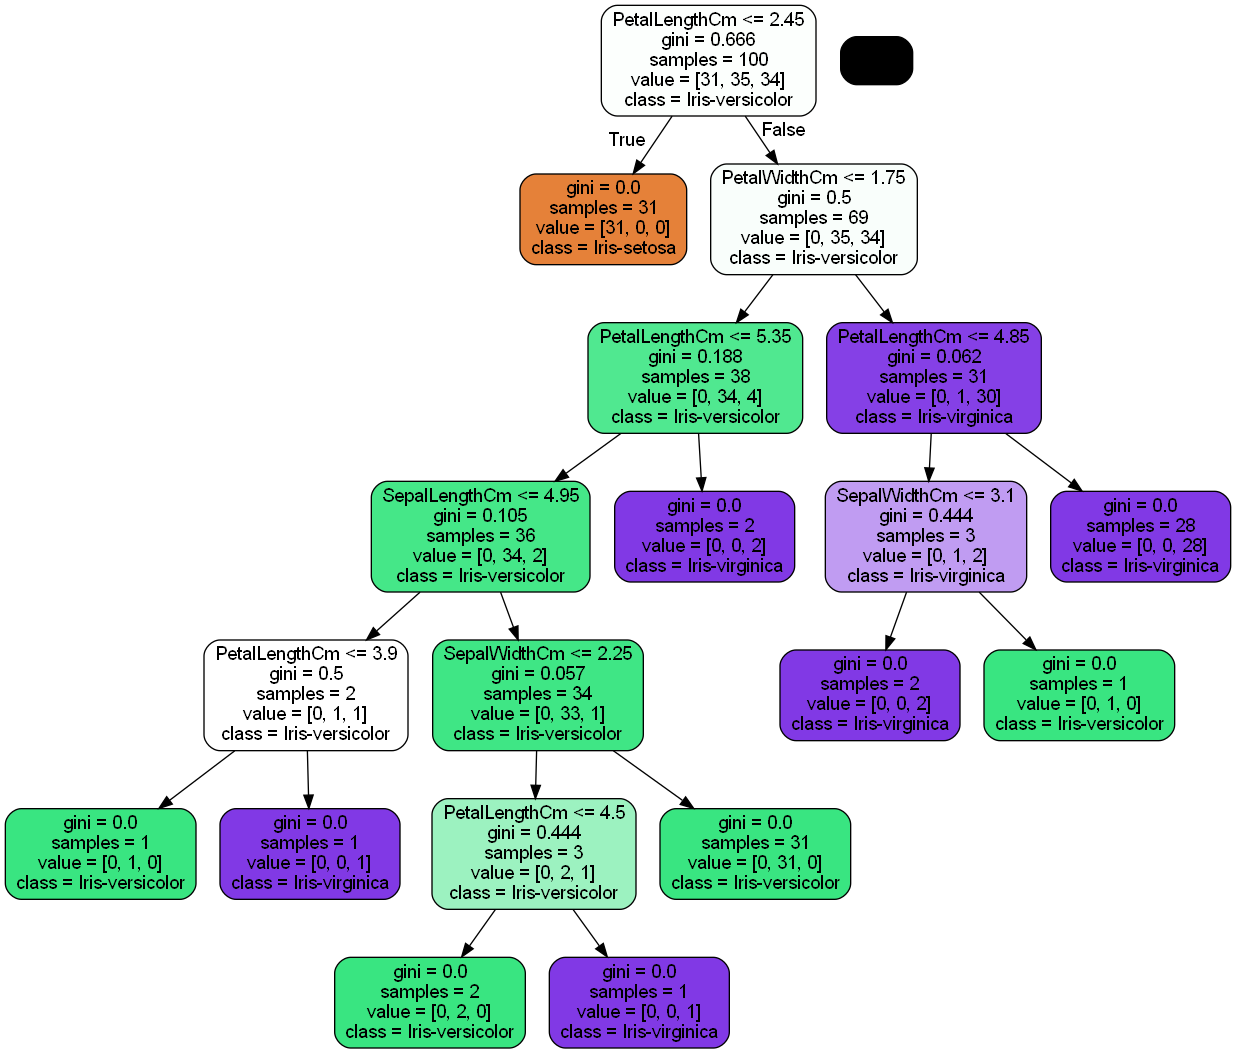

In [14]:
dot_data = StringIO()  

export_graphviz(tree, out_file=dot_data, filled=True, rounded=True,
                feature_names=X.columns, 
                class_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

#Image(graph.create_png(),width=800,height=900)

## Alternative method for Graphviz / Visualizing the Decision Tree

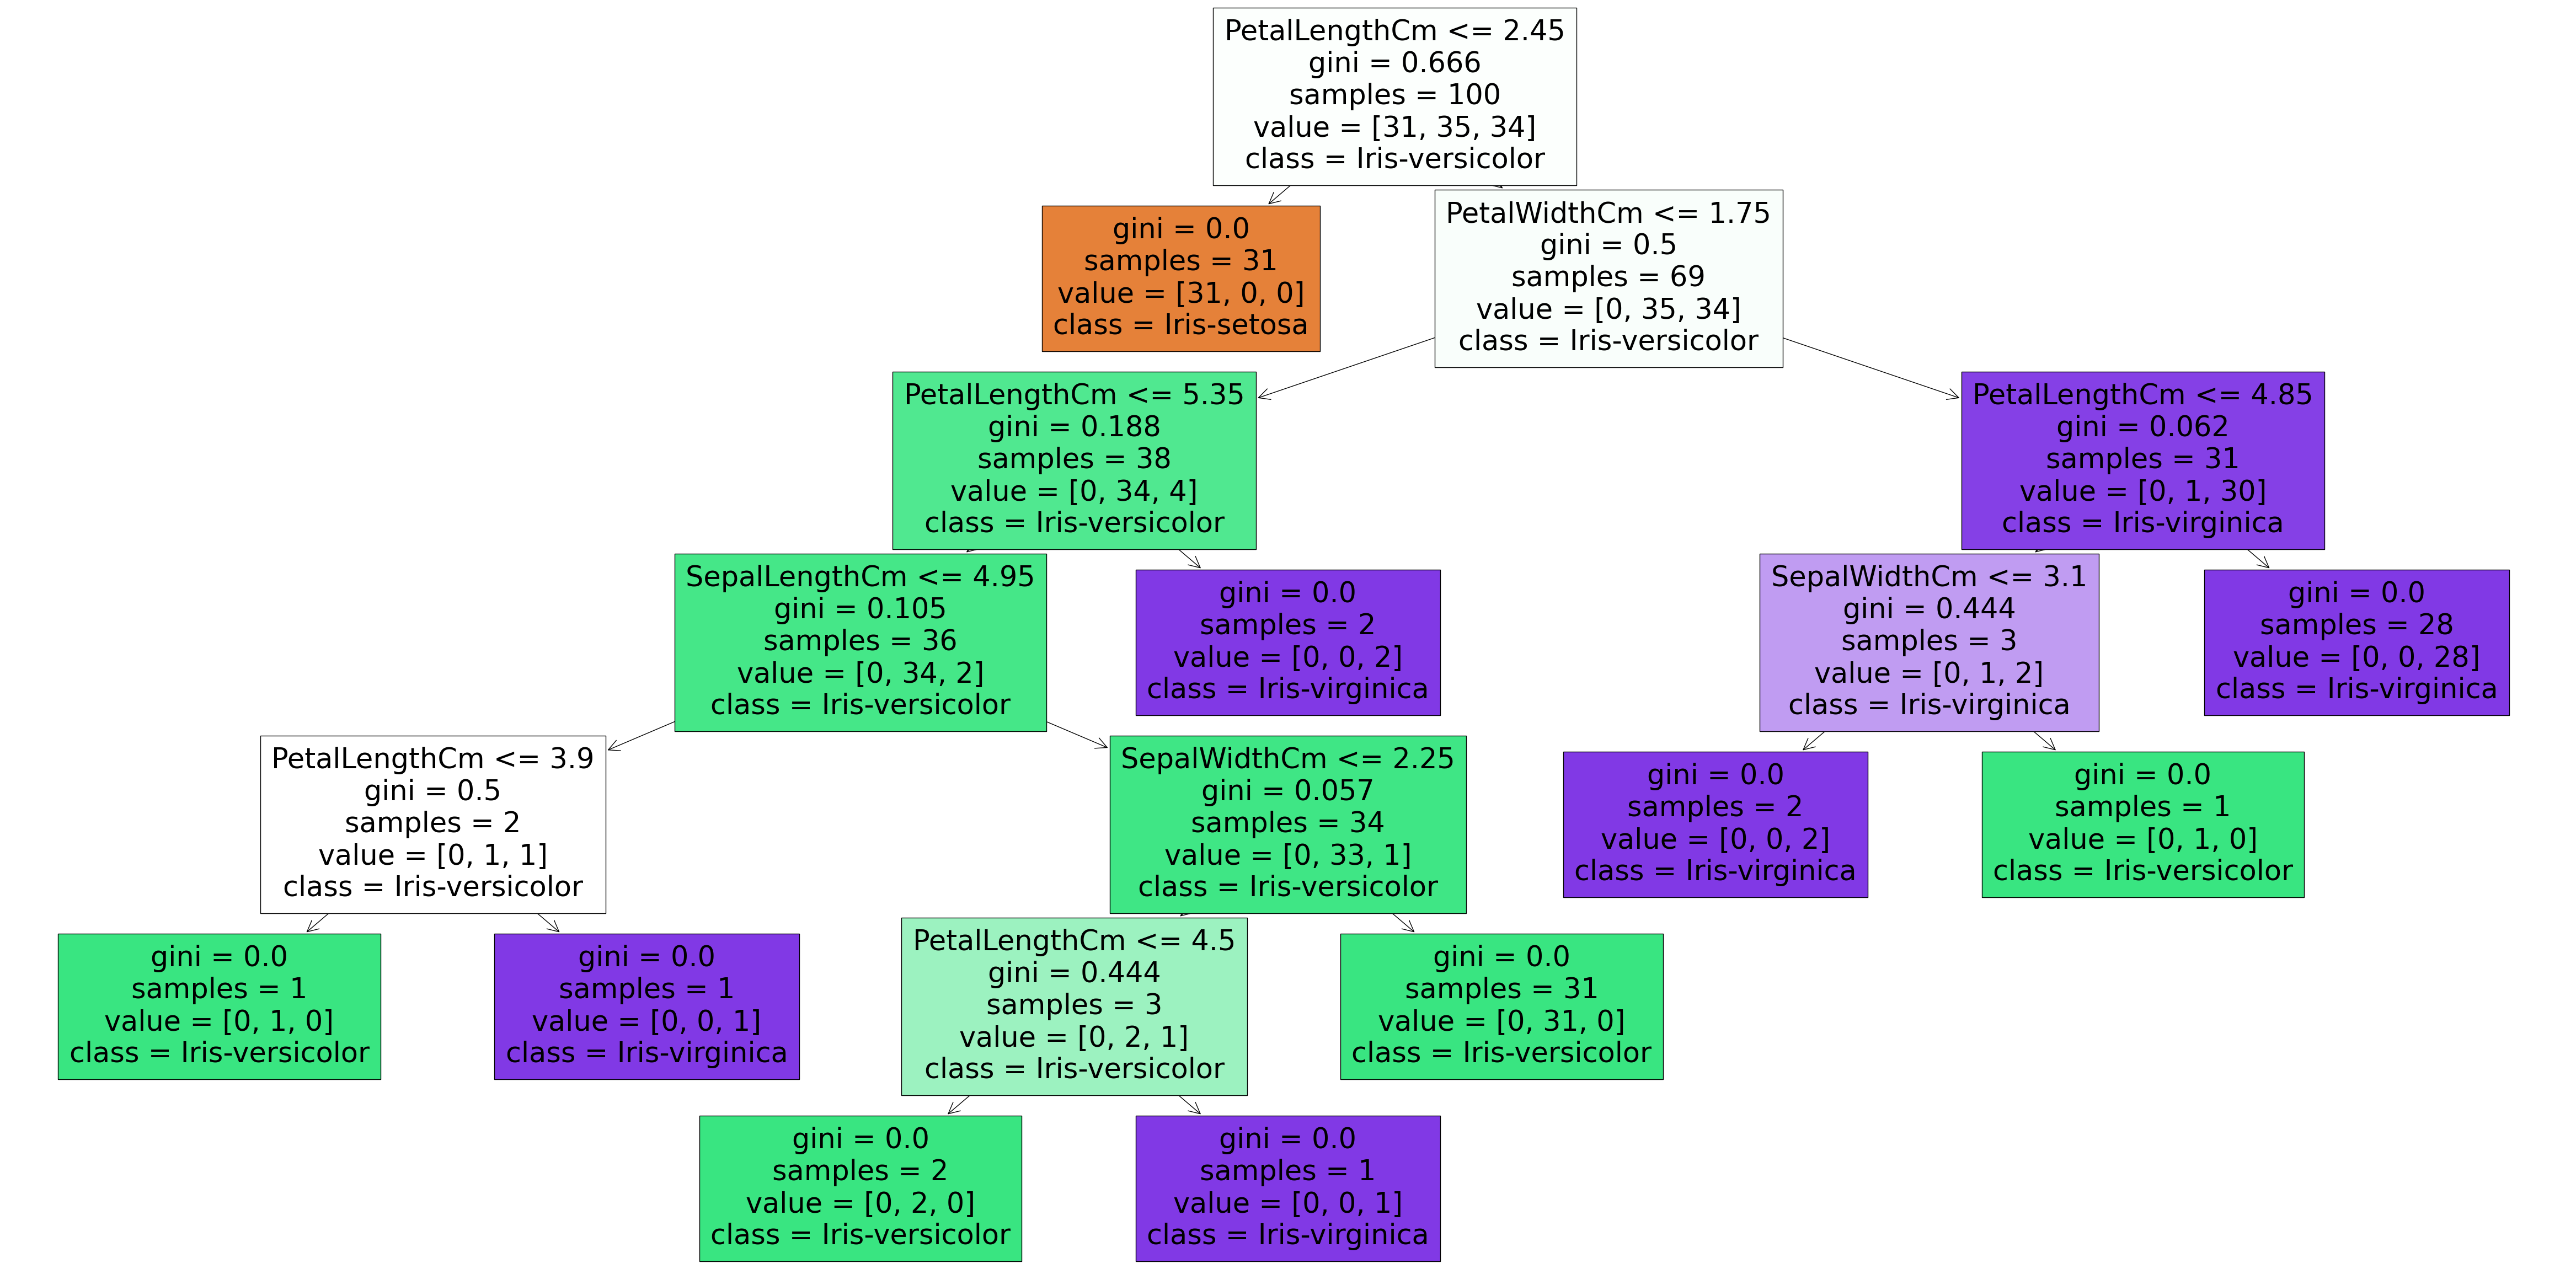

In [15]:
from sklearn.tree import plot_tree

plt.figure(figsize=(60,30))

plot_tree(tree, feature_names = X.columns,class_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],filled=True);

In [16]:
# Let's check the accuracy score and confusion matrix

from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

In [17]:
print("Train Performance :", accuracy_score(y_train, y_train_pred))
print("Train Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred))
print("-"*50)
print("Test Performance :", accuracy_score(y_test, y_test_pred))
print("Test Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))
print("-"*50)
print(classification_report(y_test, y_test_pred))

Train Performance : 1.0
Train Confusion Matrix:
[[31  0  0]
 [ 0 35  0]
 [ 0  0 34]]
--------------------------------------------------
Test Performance : 0.98
Test Confusion Matrix:
[[19  0  0]
 [ 0 15  0]
 [ 0  1 15]]
--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



# Post-Pruning Technique:-
## Post Prunning can be done by choose the best parameters and their limit manually.
## Or by taking the correct ccp_alpha value.


### ccp_alpha is a hyperparameter used in post-pruning decision trees. It specifies the parameter of minimal cost-complexity pruning, which is a post-pruning technique that removes branches of the tree that contribute less to the overall reduction of impurity while keeping the accuracy of the model.

In [18]:
# As you see in the decision tree there are so many unnecessary splits so we use max_depth parameter 

tree1 = DecisionTreeClassifier(max_depth=2)

In [19]:
tree1.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

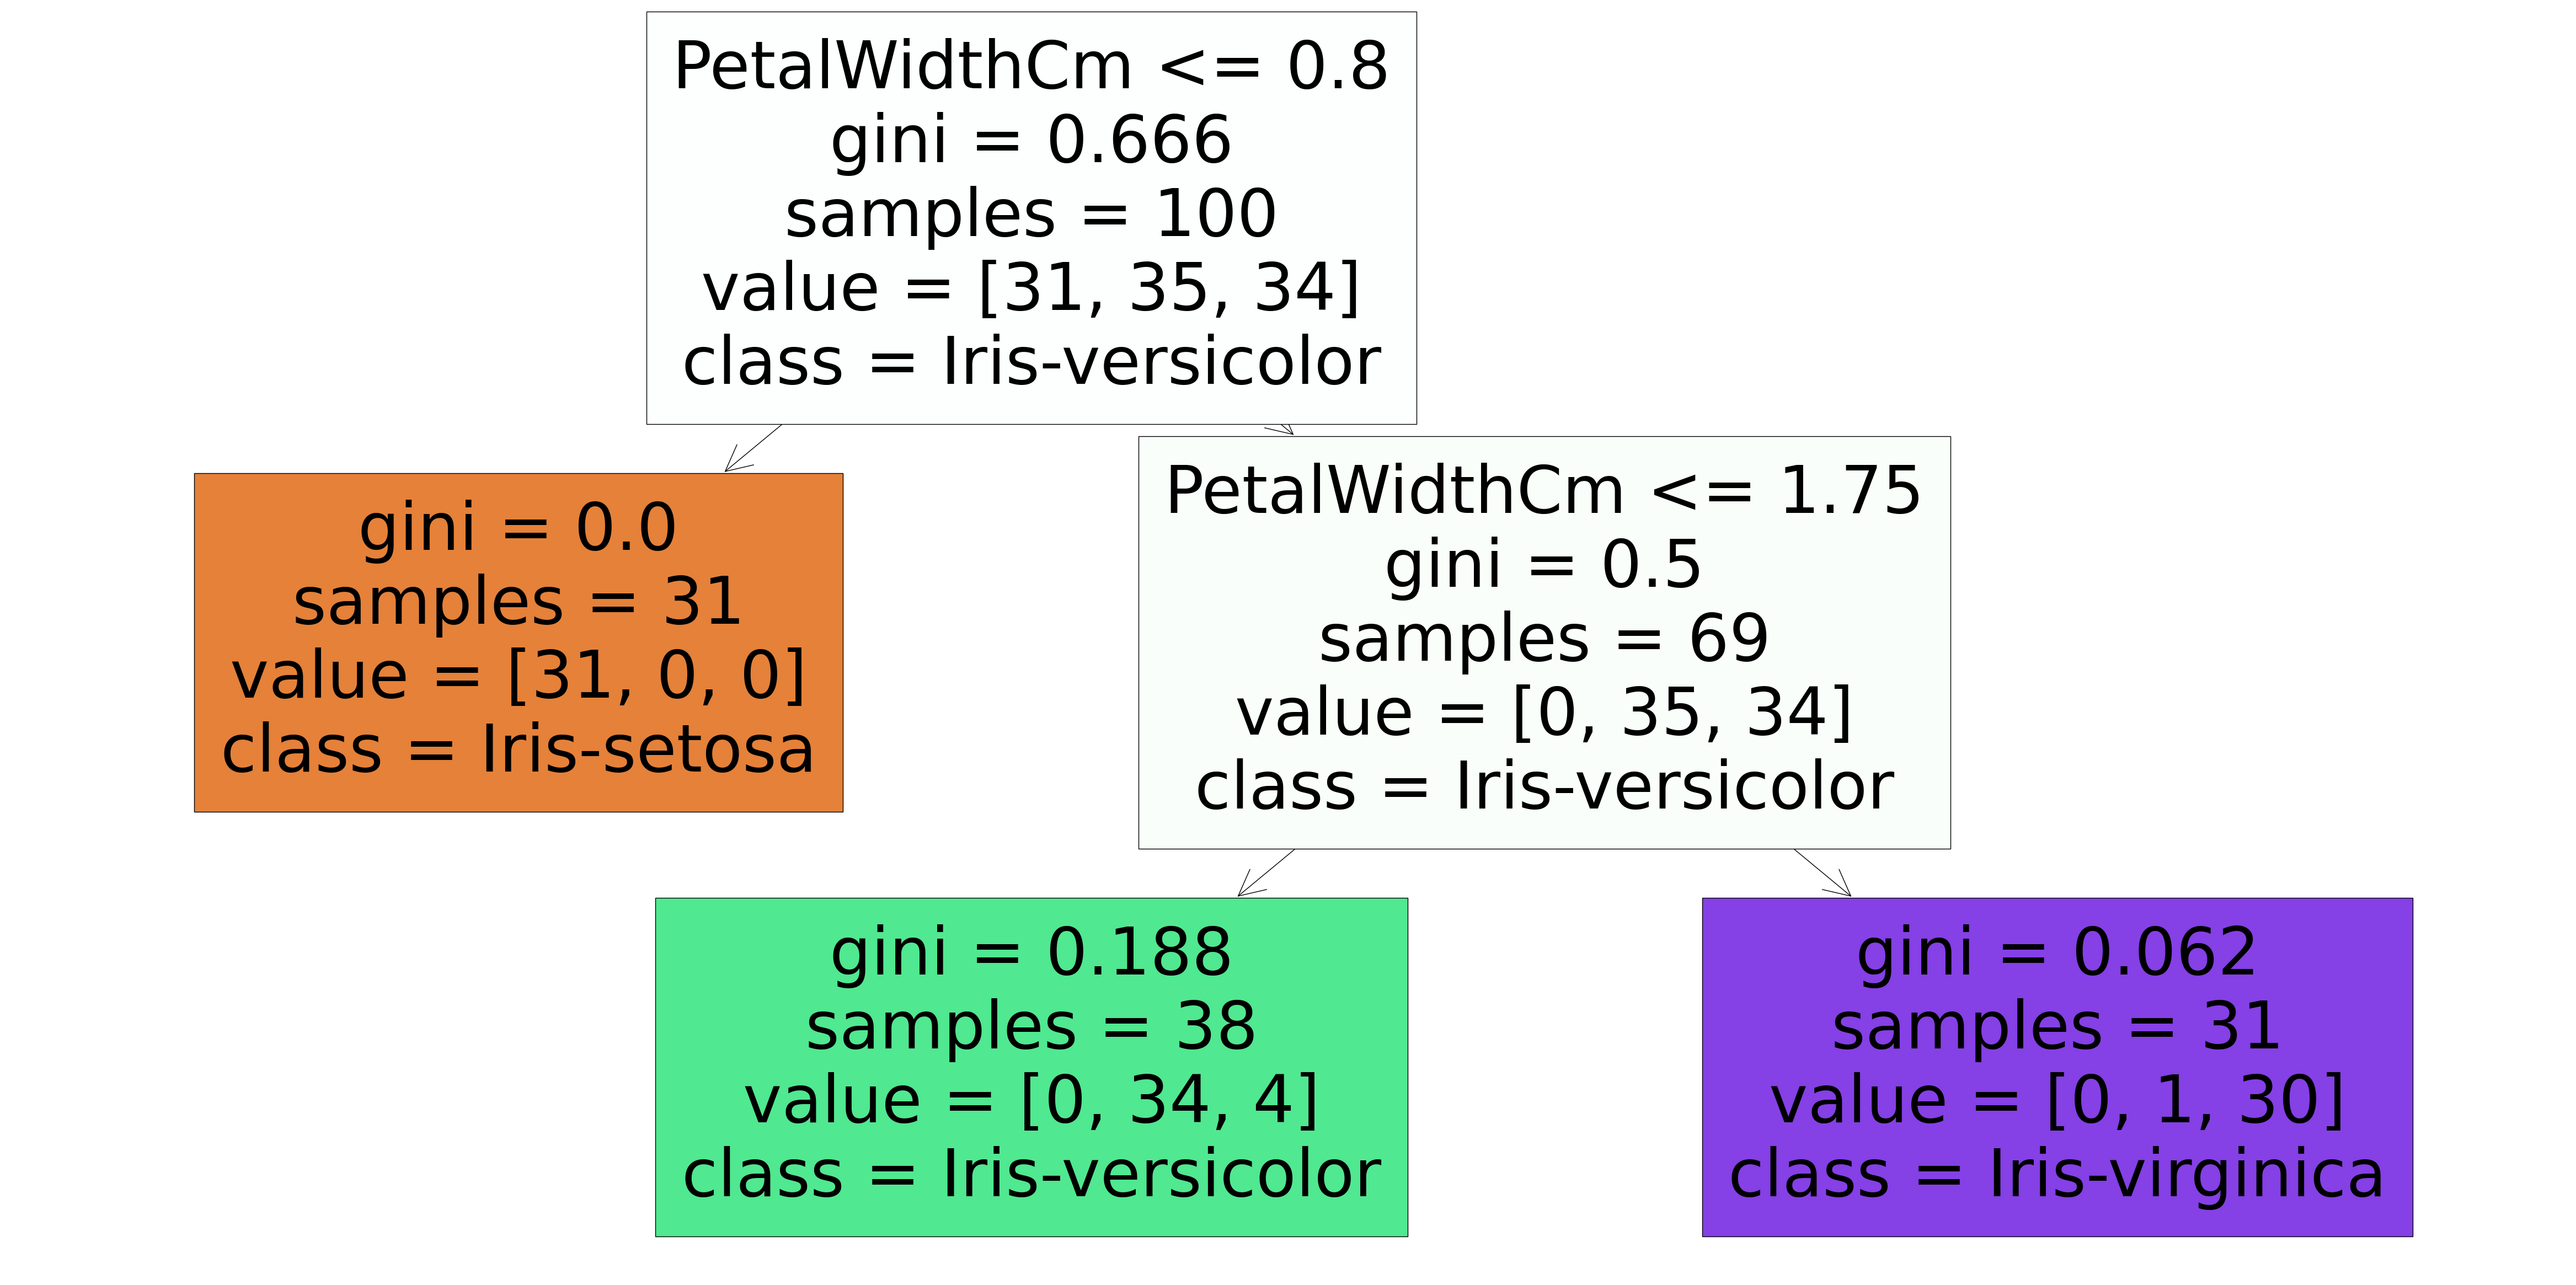

In [20]:
plt.figure(figsize=(60,30))

plot_tree(tree1, feature_names = X.columns,class_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],filled=True);

In [21]:
y_train_pred = tree1.predict(X_train)
y_test_pred = tree1.predict(X_test)

In [22]:
print("Train Performance :", accuracy_score(y_train, y_train_pred))
print("Train Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred))
print("-"*50)
print("Test Performance :", accuracy_score(y_test, y_test_pred))
print("Test Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))
print("-"*50)
print(classification_report(y_test, y_test_pred))

Train Performance : 0.95
Train Confusion Matrix:
[[31  0  0]
 [ 0 34  1]
 [ 0  4 30]]
--------------------------------------------------
Test Performance : 0.98
Test Confusion Matrix:
[[19  0  0]
 [ 0 15  0]
 [ 0  1 15]]
--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



## ccp_alpha (cost-complexity prunning)

In [23]:
path = tree1.cost_complexity_pruning_path(X_train,y_train) #pass the original data not the splitted data
ccp_alpha = path.ccp_alphas

In [24]:
path

{'ccp_alphas': array([0.        , 0.25399375, 0.32087246]),
 'impurities': array([0.09093379, 0.34492754, 0.6658    ])}

In [25]:
ccp_alpha

array([0.        , 0.25399375, 0.32087246])

In [26]:
dt_model2 = []
for ccp in ccp_alpha:
    dt_m = DecisionTreeClassifier(ccp_alpha=ccp)
    dt_m.fit(X_train,y_train)
    dt_model2.append(dt_m)

In [27]:
dt_model2

[DecisionTreeClassifier(),
 DecisionTreeClassifier(ccp_alpha=0.25399375015378556),
 DecisionTreeClassifier(ccp_alpha=0.32087246376811596)]

Text(0, 0.5, 'Accuracy Score')

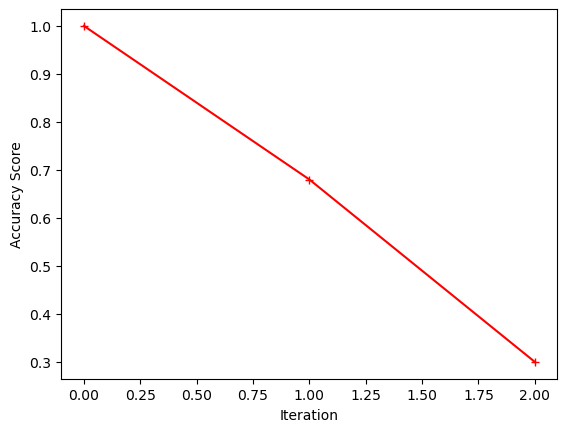

In [28]:
dt_model2 = []
score=[]
for i in ccp_alpha:
    dt_m = DecisionTreeClassifier(ccp_alpha=i)
    dt_m.fit(X_train,y_train)
    dt_model2.append(dt_m)
    score.append(dt_m.score(X_test,y_test))
    
    
plt.plot(score,'r-+')
plt.xlabel('Iteration')
plt.ylabel('Accuracy Score')

### Graph shows the accuracy_score of each iteration. Iteration is iterative ccp_alpha values.

In [29]:
dt_model2

[DecisionTreeClassifier(),
 DecisionTreeClassifier(ccp_alpha=0.25399375015378556),
 DecisionTreeClassifier(ccp_alpha=0.32087246376811596)]

In [30]:
train_score = [i.score(X_train,y_train) for i in dt_model2]
test_score = [i.score(X_test,y_test) for i in dt_model2]

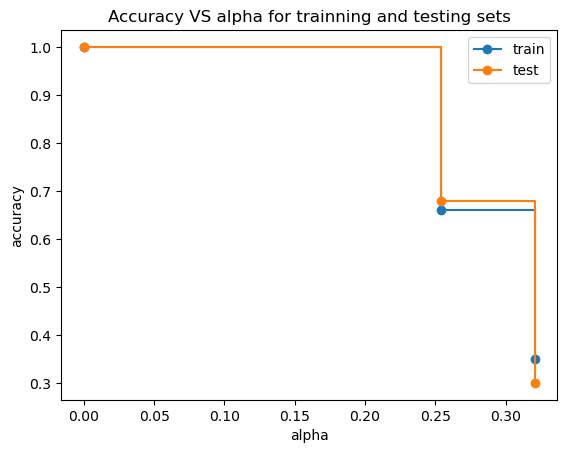

In [31]:
fig,ax = plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.set_title('Accuracy VS alpha for trainning and testing sets')
ax.plot(ccp_alpha,train_score,marker='o',label='train',drawstyle='steps-post')
ax.plot(ccp_alpha,test_score,marker='o',label='test',drawstyle='steps-post')
plt.legend()
plt.show()

In [32]:
dt_model_ccp = DecisionTreeClassifier(random_state=42,ccp_alpha=0.23)
dt_model_ccp.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.23, random_state=42)

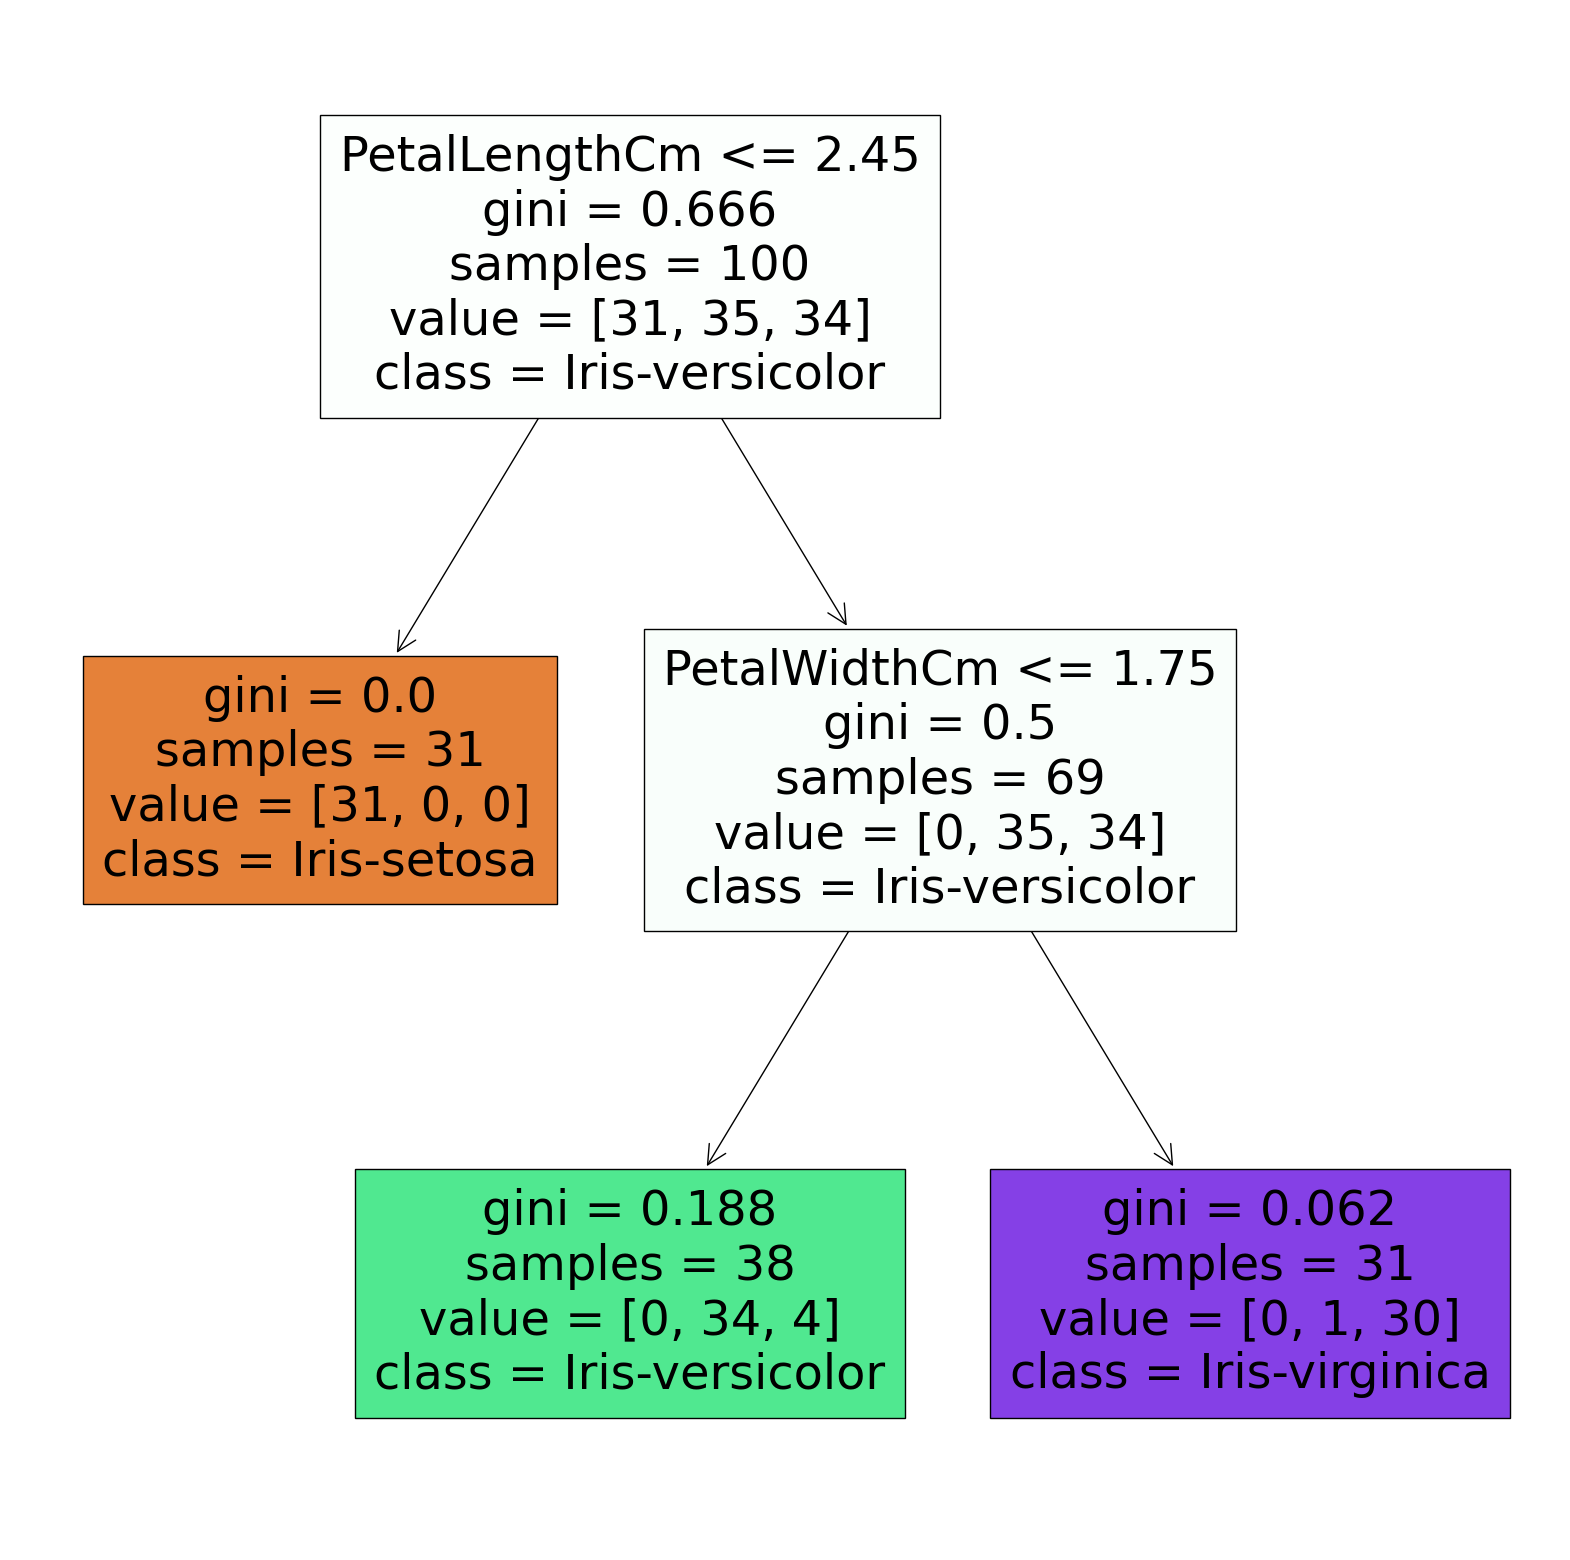

In [33]:
plt.figure(figsize=(20,20))

plot_tree(dt_model_ccp, feature_names = X_train.columns,class_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],filled=True);

In [34]:
dt_model_ccp.score(X_train,y_train)

0.95

In [35]:
dt_model_ccp.score(X_test,y_test)

0.98

# Pre Prunning Using Hyper-Parameter Tuning (GridSearchCV)

In [36]:
# Create the parameter grid based on the results of random search 
params = {
    'splitter' : ["best", "random"],
    'max_depth': [*range(1,10,1)],
    'min_samples_split':[*range(2,5,1)],
    'min_samples_leaf': [*range(1,10,1)],
    'criterion': ["gini", "entropy"]
}

In [62]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choose
 |      the best random split.
 |  
 |  max_d

In [37]:
from sklearn.model_selection import GridSearchCV

In [38]:
# Instantiate the grid search model

grid_search = GridSearchCV(estimator=tree, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=4, scoring = "accuracy")

In [64]:
help(GridSearchCV)

Help on class GridSearchCV in module sklearn.model_selection._search:

class GridSearchCV(BaseSearchCV)
 |  GridSearchCV(estimator, param_grid, *, scoring=None, n_jobs=None, refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)
 |  
 |  Exhaustive search over specified parameter values for an estimator.
 |  
 |  Important members are fit, predict.
 |  
 |  GridSearchCV implements a "fit" and a "score" method.
 |  It also implements "score_samples", "predict", "predict_proba",
 |  "decision_function", "transform" and "inverse_transform" if they are
 |  implemented in the estimator used.
 |  
 |  The parameters of the estimator used to apply these methods are optimized
 |  by cross-validated grid-search over a parameter grid.
 |  
 |  Read more in the :ref:`User Guide <grid_search>`.
 |  
 |  Parameters
 |  ----------
 |  estimator : estimator object
 |      This is assumed to implement the scikit-learn estimator interface.
 |      Either est

In [39]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 972 candidates, totalling 3888 fits
Wall time: 20.5 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_split': [2, 3, 4],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=1)

In [40]:
grid_search.cv_results_

{'mean_fit_time': array([0.00399888, 0.00399894, 0.00599849, 0.00600201, 0.00399983,
        0.00599951, 0.00400186, 0.00400025, 0.00399876, 0.00601816,
        0.00400114, 0.00200701, 0.00200057, 0.00199944, 0.        ,
        0.00600034, 0.00600177, 0.00400013, 0.00399917, 0.00200033,
        0.0040006 , 0.00400054, 0.00400108, 0.00199991, 0.00400048,
        0.00600082, 0.00800037, 0.00399929, 0.00400007, 0.00399917,
        0.00799948, 0.00400013, 0.0079996 , 0.        , 0.00599998,
        0.00200009, 0.        , 0.00200021, 0.0060001 , 0.00200015,
        0.        , 0.00200009, 0.00599968, 0.        , 0.        ,
        0.00200015, 0.0079999 , 0.        , 0.00200015, 0.00199986,
        0.0019998 , 0.00200033, 0.0019998 , 0.00399989, 0.00600076,
        0.0099991 , 0.00600106, 0.00199878, 0.00400072, 0.00400013,
        0.00400102, 0.00400048, 0.00399977, 0.00200069, 0.00399822,
        0.00599974, 0.        , 0.00200599, 0.00200051, 0.00399375,
        0.00400043, 0.00799996,

In [41]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003999,0.003999,0.008001,0.000002,gini,1,1,2,best,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.64,0.48,0.68,0.64,0.61,0.076811,905
1,0.003999,0.003999,0.010002,0.008722,gini,1,1,2,random,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.64,0.68,0.60,0.68,0.65,0.033166,877
2,0.005998,0.003463,0.005998,0.003463,gini,1,1,3,best,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.64,0.48,0.68,0.64,0.61,0.076811,905
3,0.006002,0.003465,0.002002,0.003468,gini,1,1,3,random,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.52,0.68,0.64,0.64,0.62,0.060000,897
4,0.004000,0.004000,0.005996,0.003462,gini,1,1,4,best,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.64,0.48,0.68,0.64,0.61,0.076811,905


In [42]:
score_df.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
601,0.002000,0.003464,0.008001,0.000002,entropy,3,2,2,random,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",1.0,0.92,1.00,1.00,0.98,0.034641,1
191,0.004000,0.004000,0.000000,0.000000,gini,4,5,4,random,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",1.0,0.88,1.00,1.00,0.97,0.051962,2
231,0.004000,0.004000,0.001994,0.003453,gini,5,3,3,random,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",1.0,0.92,1.00,0.96,0.97,0.033166,2
845,0.004001,0.004001,0.002000,0.003464,entropy,7,6,4,random,"{'criterion': 'entropy', 'max_depth': 7, 'min_...",1.0,0.92,0.96,1.00,0.97,0.033166,2
923,0.003999,0.003999,0.004000,0.004000,entropy,9,1,4,random,"{'criterion': 'entropy', 'max_depth': 9, 'min_...",1.0,0.88,1.00,1.00,0.97,0.051962,2


In [43]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=2,
                       splitter='random')

In [44]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'splitter': 'random'}

In [45]:
grid_search.predict(X_train)

array([1, 2, 1, 0, 2, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0,
       1, 1, 1, 1, 2, 1, 0, 1, 1, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 1, 1,
       2, 1, 0, 0, 1, 1, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 1, 1, 2, 0, 2,
       1, 2, 1, 1, 1, 0, 1, 1, 0, 1, 1, 2, 0, 1, 2, 1, 0, 2, 0, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 0, 1, 1, 0, 1, 2], dtype=int64)

In [52]:
tree = DecisionTreeClassifier(criterion='entropy',max_depth= 3,min_samples_leaf=2,splitter='random')

In [53]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=2,
                       splitter='random')

In [54]:
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

In [55]:
print("Train Performance :", accuracy_score(y_train, y_train_pred))
print("Train Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred))
print("-"*50)
print("Test Performance :", accuracy_score(y_test, y_test_pred))
print("Test Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))
print("-"*50)
print(classification_report(y_test, y_test_pred))

Train Performance : 0.73
Train Confusion Matrix:
[[31  0  0]
 [ 0  8 27]
 [ 0  0 34]]
--------------------------------------------------
Test Performance : 0.74
Test Confusion Matrix:
[[19  0  0]
 [ 0  2 13]
 [ 0  0 16]]
--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.13      0.24        15
           2       0.55      1.00      0.71        16

    accuracy                           0.74        50
   macro avg       0.85      0.71      0.65        50
weighted avg       0.86      0.74      0.68        50



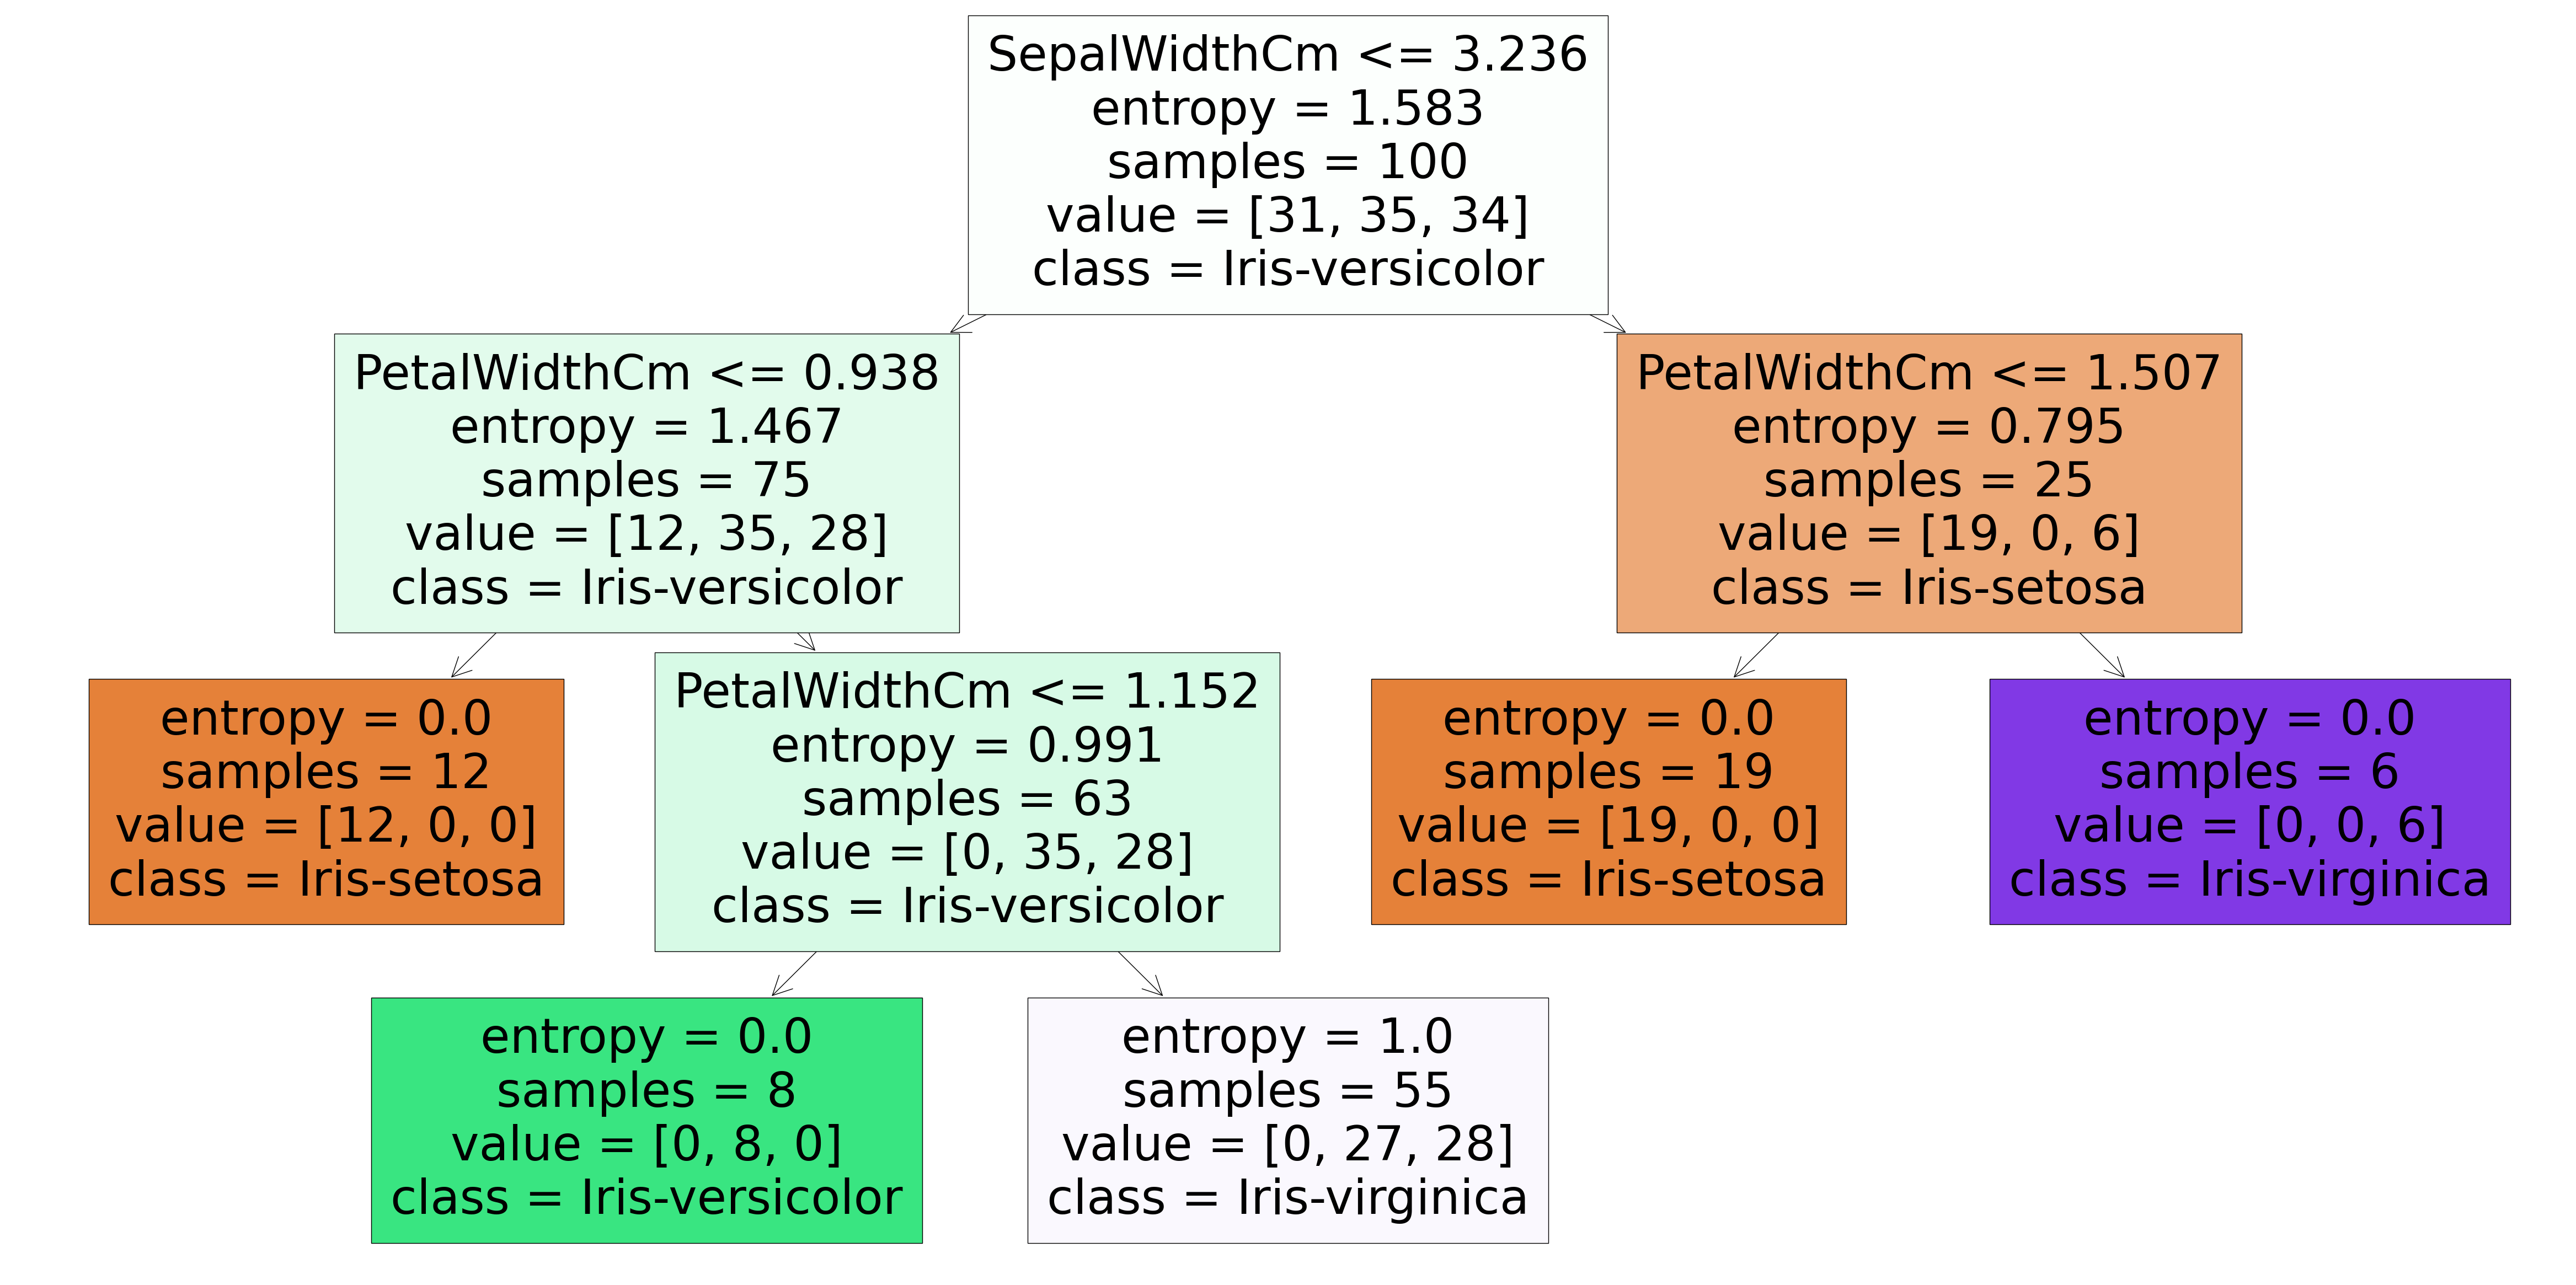

In [56]:
plt.figure(figsize=(60,30))

plot_tree(tree, feature_names = X.columns,class_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],filled=True);

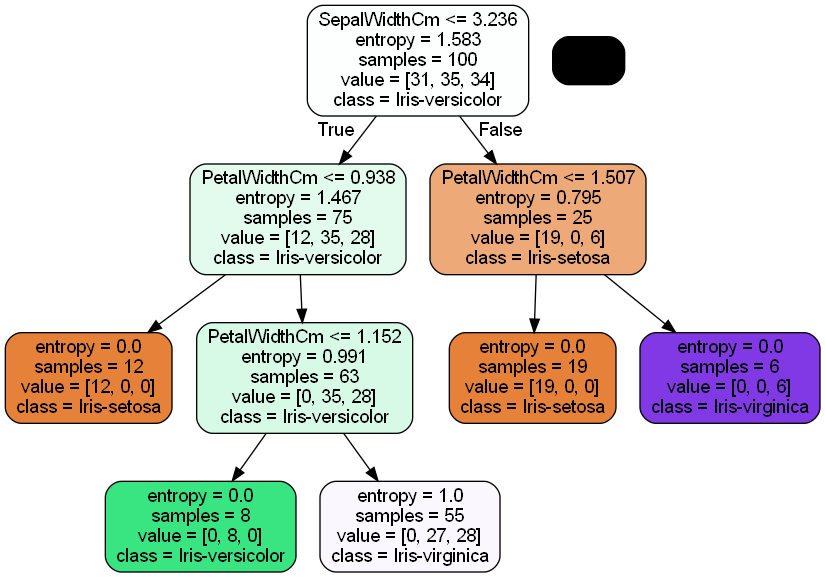

In [57]:
# plotting tree with max_depth=3

dot_data = StringIO()  

export_graphviz(tree, out_file=dot_data, filled=True, rounded=True,
                feature_names=X.columns, 
                class_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

#Image(graph.create_png(),width=800,height=900)

In [58]:
tree.feature_importances_

array([0.        , 0.27506653, 0.        , 0.72493347])

In [60]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": tree.feature_importances_
})

In [61]:
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
3,PetalWidthCm,0.724933
1,SepalWidthCm,0.275067
0,SepalLengthCm,0.000000
2,PetalLengthCm,0.000000
